In [1]:
import draw2Svg as dw

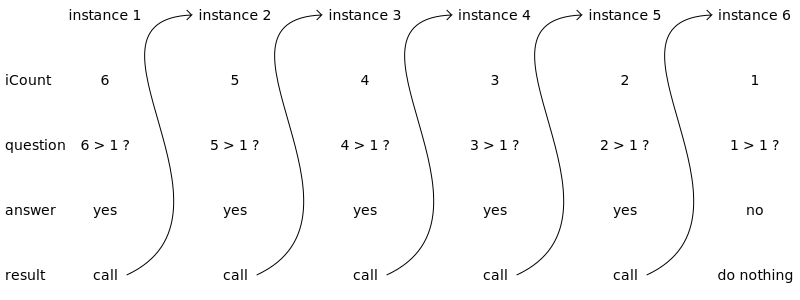

In [11]:
wdth,hght = 800,300
d = dw.Drawing(wdth,hght)

def grid(num,length=800,margin_1=40,margin_2=41):
    """returns a list of num grid values between
    margin_1 and height-margin_2 which are subtracted from length.
    for horizontal, it counts from left to right
    for vertical, it counts from top to bottom"""
    real_length = length - margin_1 - margin_2
    grid_step = real_length / (num-1)
    return [i*grid_step+margin_1 for i in range(num)]

x_grid = grid(6,wdth,margin_2=110)
x_grid_wdth = x_grid[1] - x_grid[0]
y_grid = grid(5,hght,20,20)
y_grid_hght = y_grid[1] - y_grid[0]

textsize = 14

text_left = ['question','answer','result']
for i in range(3):
    d.append(dw.Text(text_left[i],textsize,5,y_grid[i+2]))
d.append(dw.Text('iCount',textsize,5,y_grid[1],font_style='italic'))
    
for i,x in enumerate(x_grid):
    x += x_grid_wdth / 2
    d.append(dw.Text('instance %d'%(i+1),textsize,x,y_grid[0],text_anchor='middle'))
    d.append(dw.Text(str(6-i),textsize,x,y_grid[1],text_anchor='middle'))
    d.append(dw.Text('%d > 1 ?'%(6-i),textsize,x,y_grid[2],text_anchor='middle'))
    if i<5: answer,result = 'yes','call'
    else: answer,result = 'no','do nothing'
    d.append(dw.Text(answer,textsize,x,y_grid[3],text_anchor='middle'))
    d.append(dw.Text(result,textsize,x,y_grid[4],text_anchor='middle'))

p = dw.Path(fill='none',stroke='black')
p.M(0,-5)
p.C(x_grid_wdth,-y_grid_hght, -x_grid_wdth/2,-y_grid_hght*4, x_grid_wdth/2,-y_grid_hght*4-5)
alen = 5
p.l(-alen,alen)
p.m(alen,-alen)
p.l(-alen,-alen)

for i in range(1,6):
    d.append(dw.Use(p,x_grid[i]-x_grid_wdth/3,y_grid[4]))

d.savePng('../../images/01-GS-09-a.png')
d